In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys
import os
from sklearn.base import clone 
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.train import TrainStationModel, OptModelSelectionMethods
from src.plotting import plot_r2_heatmap
from src.utils import CrossValidation as cv

# Load Data

In [2]:
proc = GatherFeatureDatasets(is_p=True)

In [3]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')
holdout = pd.read_csv(f'{data_dir}/p.2022.csv')
station_feature_dict, station_meta_dict, feature_names = proc.process_all_stations_datasets(train, 
                                                                  test, 
                                                                  holdout_df=holdout,
                                                                  scaler=False,
                                                                  linear_model=False,
                                                                  source_dist_type='dist')
feature_names

YHB
X shape: (2920, 45), y shape: (2920,)
X shape: (734, 45), y shape: (734,)
X shape: (148, 45), y shape: (148,)
YDC
X shape: (2509, 45), y shape: (2509,)
X shape: (645, 45), y shape: (645,)
X shape: (67, 45), y shape: (67,)
YWB
X shape: (3069, 45), y shape: (3069,)
X shape: (786, 45), y shape: (786,)
X shape: (157, 45), y shape: (157,)
MCID
X shape: (2942, 45), y shape: (2942,)
X shape: (771, 45), y shape: (771,)
X shape: (142, 45), y shape: (142,)
YHL
X shape: (2739, 45), y shape: (2739,)
X shape: (682, 45), y shape: (682,)
X shape: (150, 45), y shape: (150,)
YMR
X shape: (3393, 45), y shape: (3393,)
X shape: (845, 45), y shape: (845,)
X shape: (177, 45), y shape: (177,)
YHH
X shape: (4005, 45), y shape: (4005,)
X shape: (1002, 45), y shape: (1002,)
X shape: (185, 45), y shape: (185,)
B207
X shape: (1609, 45), y shape: (1609,)
X shape: (380, 45), y shape: (380,)
YPP
X shape: (1334, 45), y shape: (1334,)
X shape: (338, 45), y shape: (338,)
X shape: (89, 45), y shape: (89,)
YPM
X shap

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [4]:
selected_features = ['amp_1', 'amp_2','signal_dominant_amplitude',
                    'signal_max_amplitude', 'signal_variance',
                    'noise_variance', 'source_depth_km',
                    'source_receiver_distance_logkm',
                    'source_receiver_back_azimuth_deg']

In [5]:
selected_feat_dict, selected_feature_names = proc.filter_station_dict_features(station_feature_dict,
                                                                             feature_names,
                                                                             selected_features)

YHB
X_train: (2920, 9), X_test: (734, 9), X_holdout: (148, 9)
YDC
X_train: (2509, 9), X_test: (645, 9), X_holdout: (67, 9)
YWB
X_train: (3069, 9), X_test: (786, 9), X_holdout: (157, 9)
MCID
X_train: (2942, 9), X_test: (771, 9), X_holdout: (142, 9)
YHL
X_train: (2739, 9), X_test: (682, 9), X_holdout: (150, 9)
YMR
X_train: (3393, 9), X_test: (845, 9), X_holdout: (177, 9)
YHH
X_train: (4005, 9), X_test: (1002, 9), X_holdout: (185, 9)
B207
X_train: (1609, 9), X_test: (380, 9), X_holdout: 0
YPP
X_train: (1334, 9), X_test: (338, 9), X_holdout: (89, 9)
YPM
X_train: (3358, 9), X_test: (843, 9), X_holdout: (172, 9)
YLT
X_train: (1275, 9), X_test: (291, 9), X_holdout: (52, 9)
QLMT
X_train: (792, 9), X_test: (190, 9), X_holdout: (1, 9)
H17A
X_train: (527, 9), X_test: (142, 9), X_holdout: 0
B208
X_train: (526, 9), X_test: (134, 9), X_holdout: 0
LKWY
X_train: (1016, 9), X_test: (278, 9), X_holdout: 0
FLWY
X_train: (694, 9), X_test: (177, 9), X_holdout: (43, 9)
YGC
X_train: (1725, 9), X_test: (451, 

In [6]:
selected_features

['amp_1',
 'amp_2',
 'signal_dominant_amplitude',
 'signal_max_amplitude',
 'signal_variance',
 'noise_variance',
 'source_depth_km',
 'source_receiver_distance_logkm',
 'source_receiver_back_azimuth_deg']

# Set Parameters

In [7]:
# Model parameters
model = SVR(kernel='rbf')
model_scaler = True
outdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_model_clone'
phase = 'P'
model_selector = OptModelSelectionMethods.select_cv_ind_min_C
model_selector_tol = 0.005

# CV Parameters
cv_random_state = 2652124
cv_folds_inner = 5
svr_C_range= 10**np.arange(-3, 5, dtype=float)
svr_gamma_range = 10**np.arange(-4, 3, dtype=float)
param_grid = [
    {'m__C': svr_C_range, 'm__gamma': svr_gamma_range},
]
scoring_method='r2'
n_jobs_inner = 5
print(param_grid)

[{'m__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'm__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}]


# Select hyperparameters, train and evaluate the final model

YHB


YDC
YWB
MCID
YHL
YMR
YHH
B207
YPP
YPM
YLT
QLMT


/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/featmags/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


H17A
B208
LKWY
FLWY
YGC
TPMT
YMC
YML
B206


/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/featmag/src/plotting.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


B944
YLA
YUF
YTP
YNR
YNM
YFT
YPC
YJC
YMS
YMV
B950
YDD


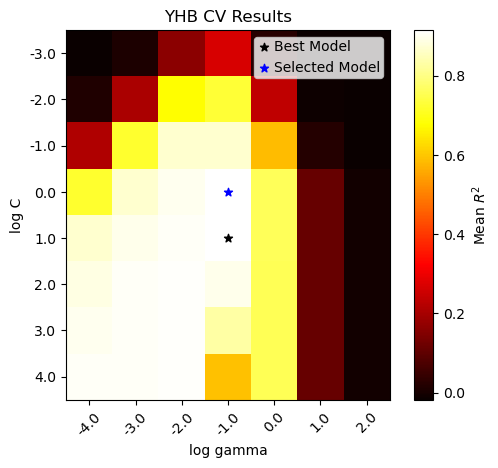

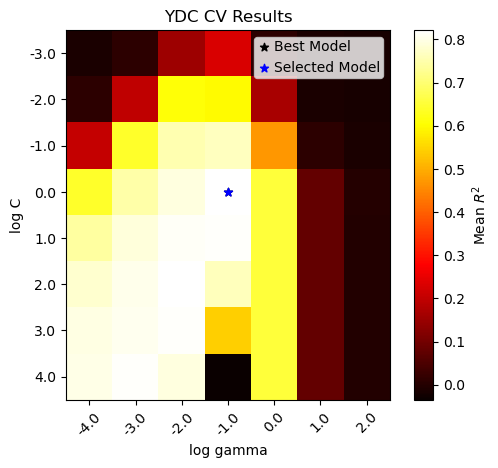

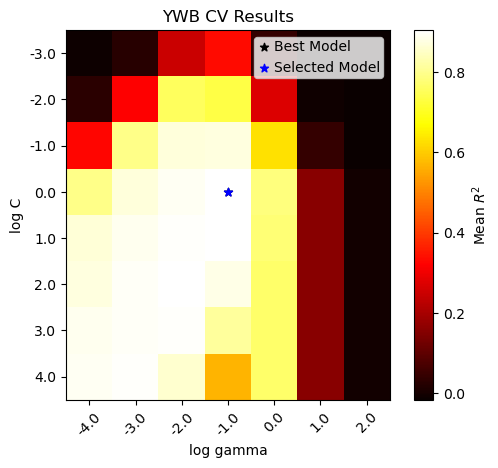

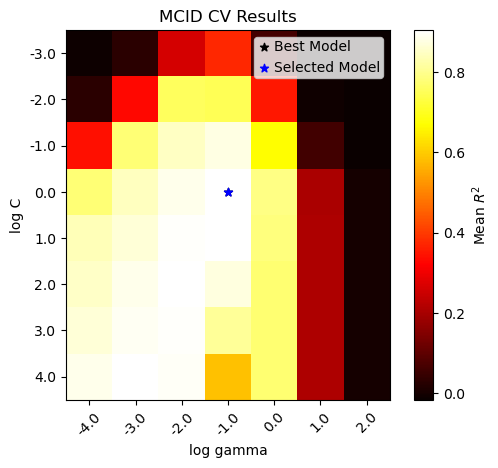

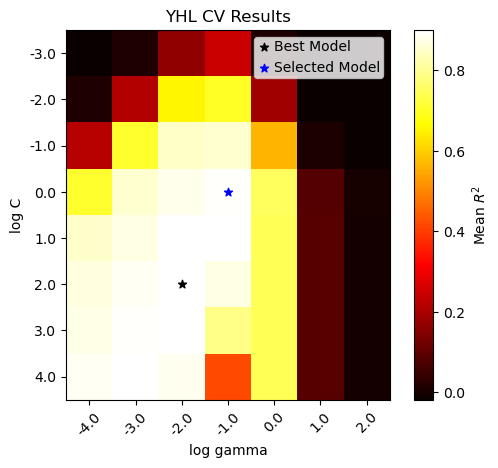

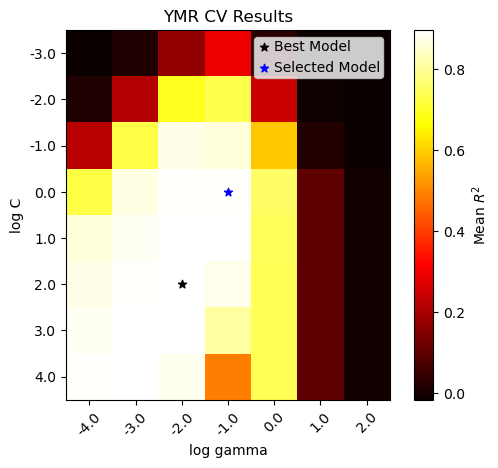

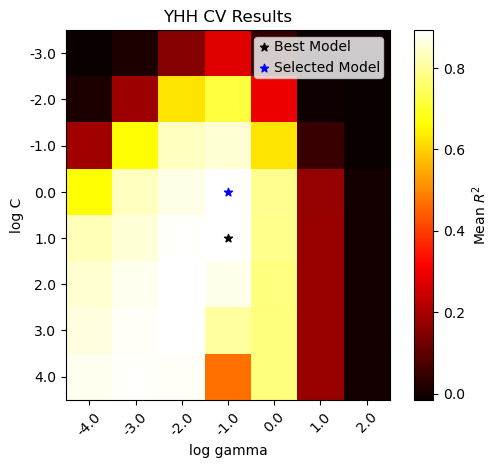

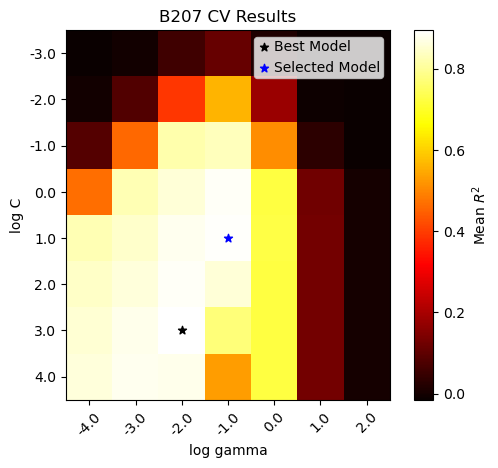

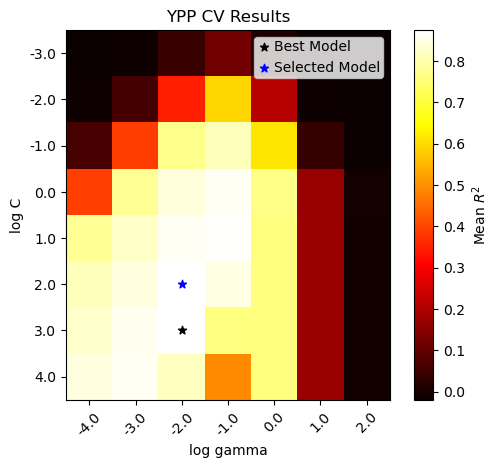

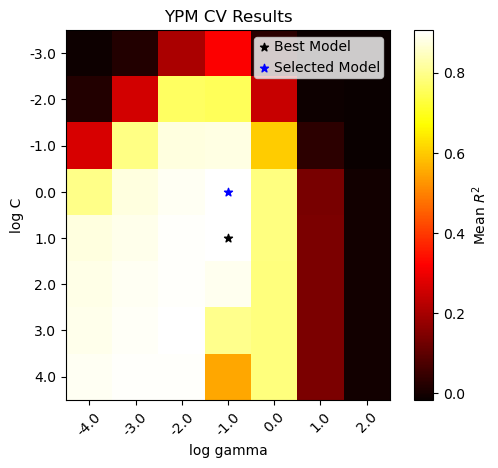

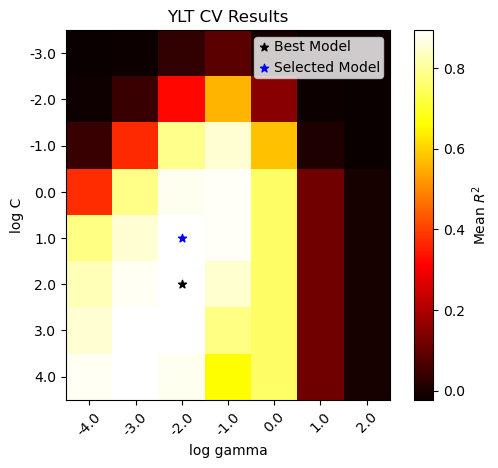

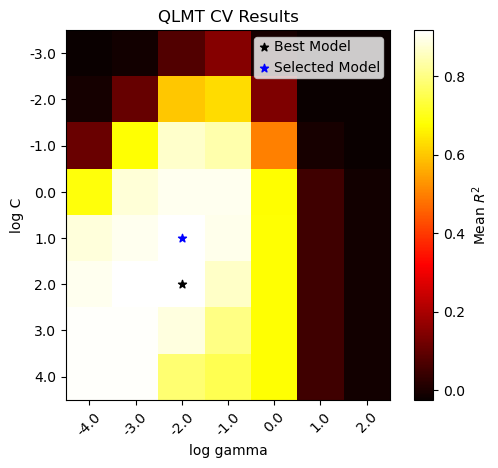

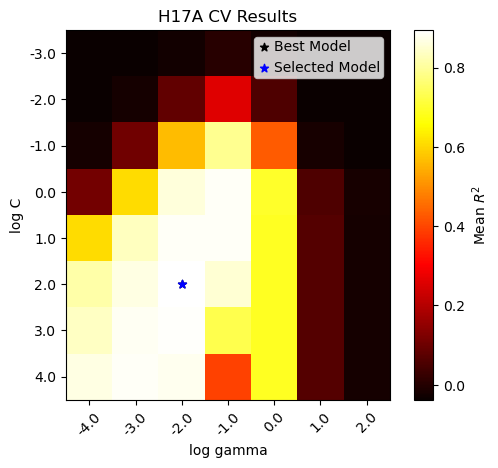

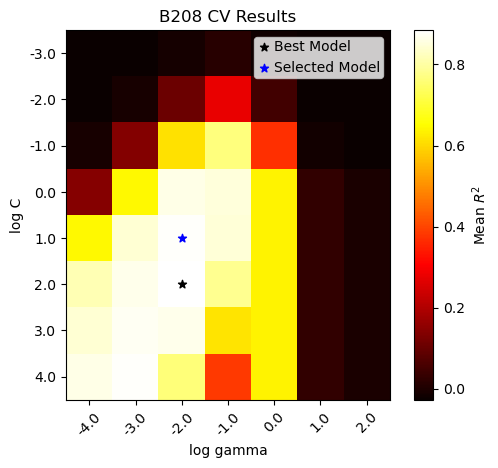

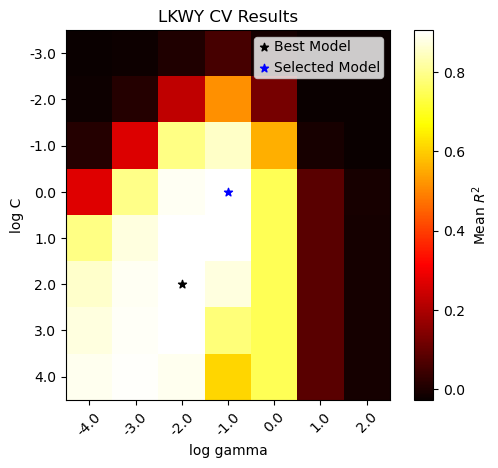

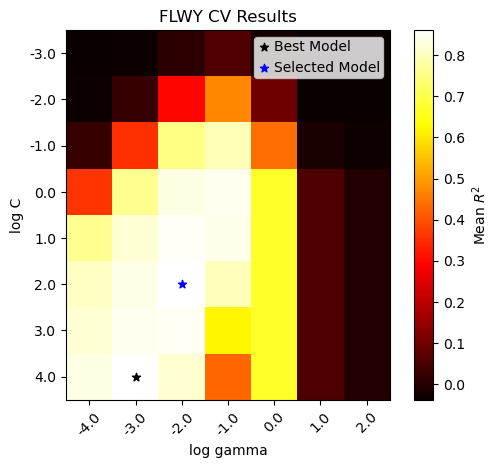

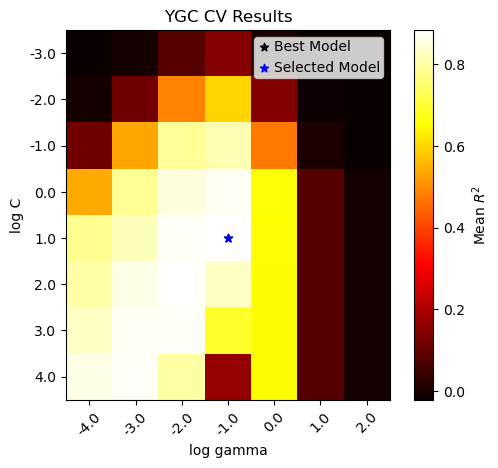

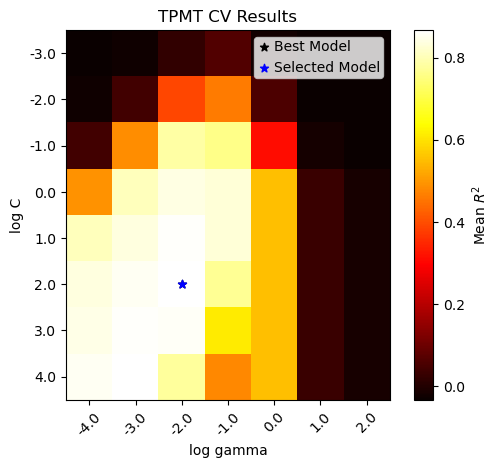

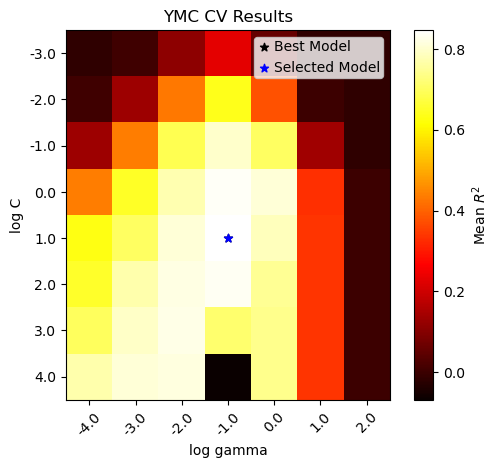

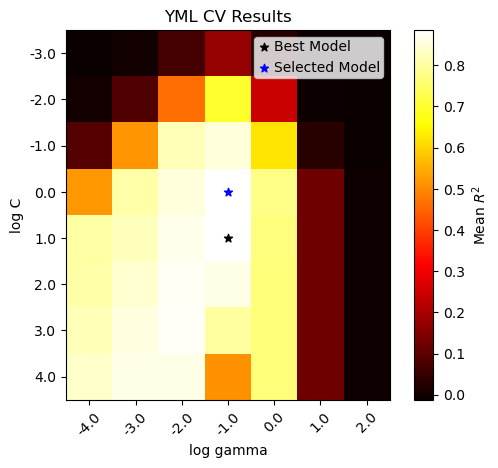

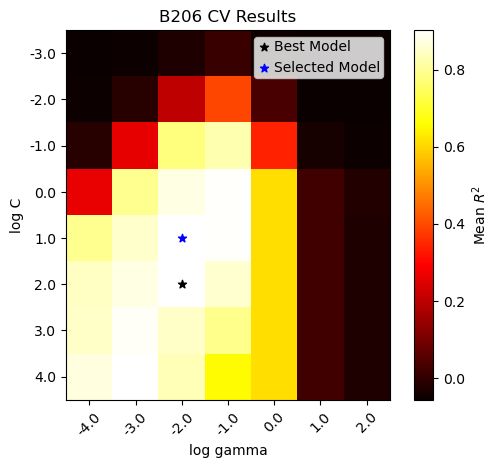

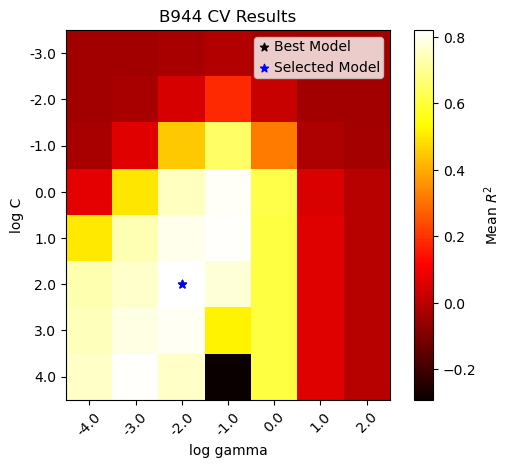

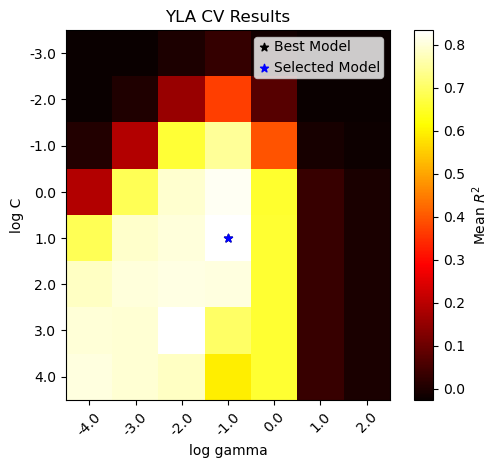

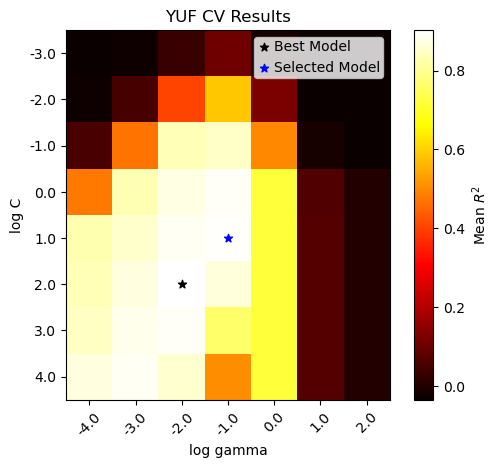

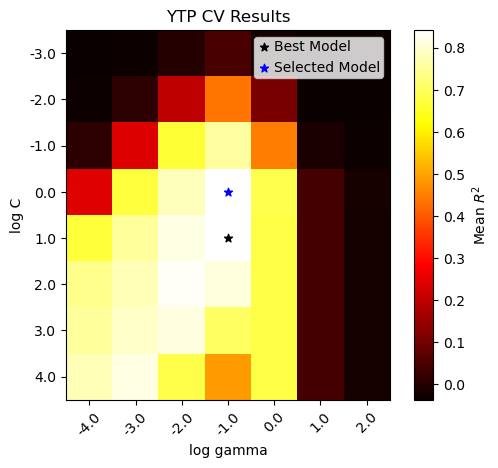

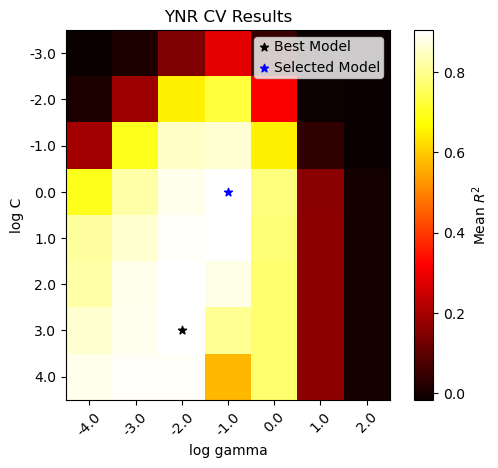

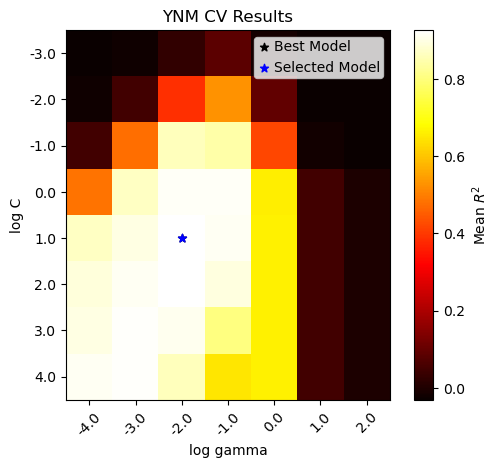

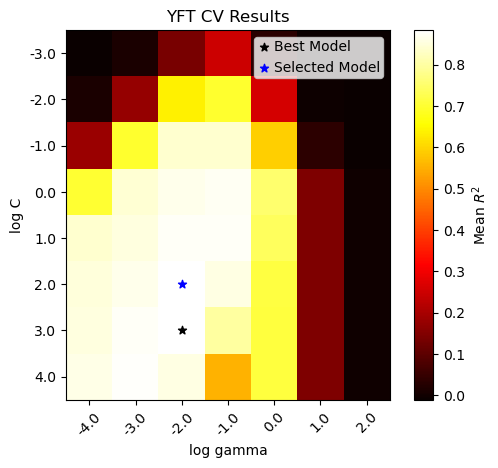

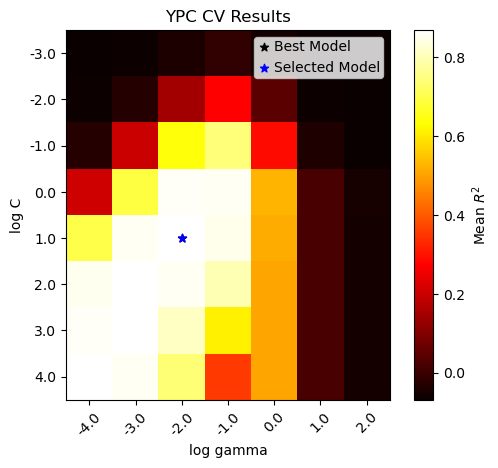

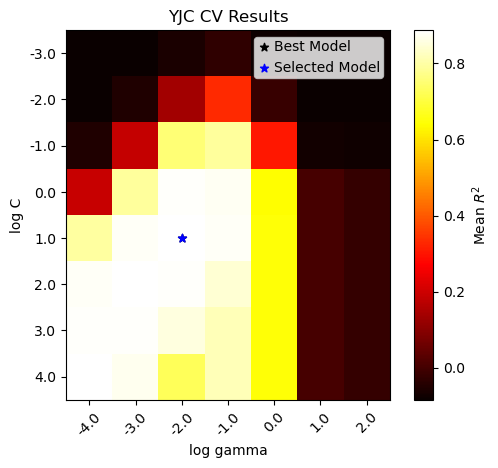

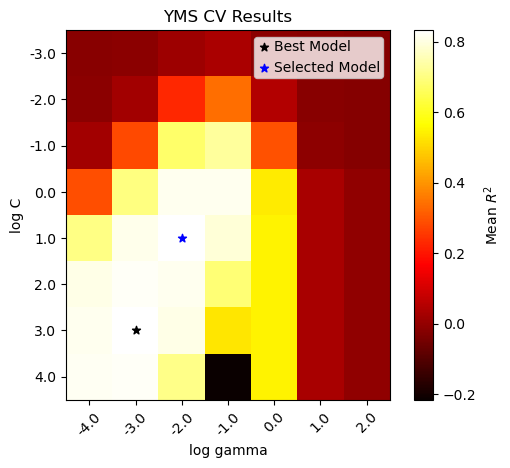

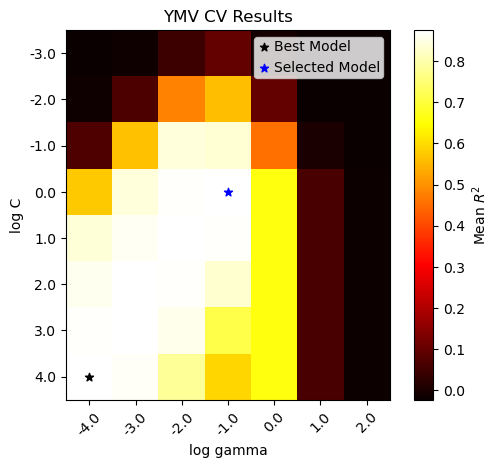

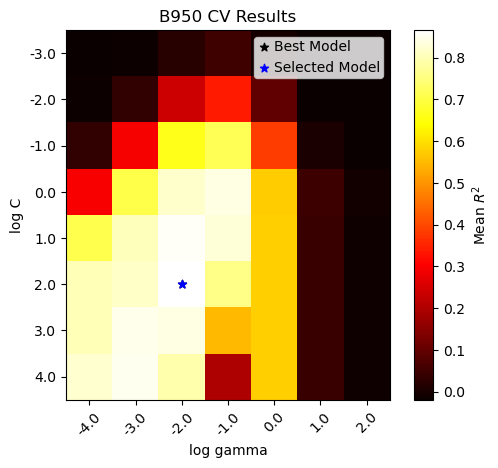

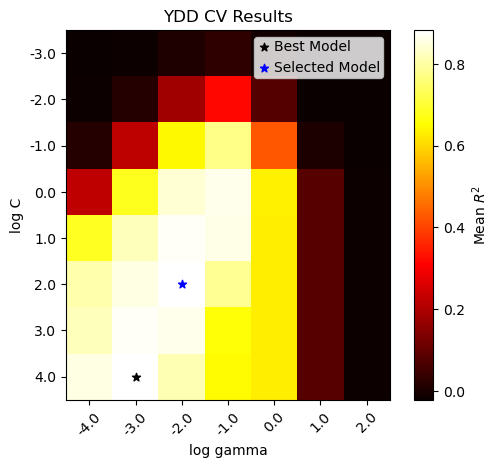

In [8]:
stations = selected_feat_dict.keys()
results_dict_list = []

for station in stations:
    # Set up the grid search
    print(station)
    search, cv_inner = cv.setup_cv(clone(model),
                param_grid,
                model_scaler=model_scaler,
                scoring_method=scoring_method,
                n_jobs=n_jobs_inner,
                cv_folds=cv_folds_inner,
                cv_random_state=cv_random_state,
                refit_model = False)
    
    trainer = TrainStationModel(station,
                                phase,
                                selected_feat_dict[station],
                                station_meta_dict[station])
    
    opt_pipeline = cv.make_simple_pipeline(clone(model), model_scaler)
    gs_results, train_results_dict = trainer.train_model_with_cv(search,
                                                                    opt_pipeline,
                                                                    model_selector_fn=model_selector,
                                                                    model_selector_tol=model_selector_tol
                                                                    )
    all_yhat, eval_results_dict = trainer.eval_all_splits(opt_pipeline)
    results_dict = trainer.format_results_dict(train_results_dict,eval_results_dict)
    trainer.save_all_predictions(all_yhat, outdir)
    trainer.save_model(opt_pipeline, outdir)
    plot_r2_heatmap(gs_results, 
                    svr_C_range,
                    svr_gamma_range,
                    train_results_dict['cv_ind_sel'], 
                    station,
                    outdir=outdir,
                    show=True)
    
    results_dict_list.append(results_dict)

results_df = pd.DataFrame(results_dict_list)
results_df.to_csv(os.path.join(outdir, 'all.stat.results.csv'), index=False)                                   

In [9]:
results_dict_list

[{'cv_mean_best': 0.9150347003340263,
  'cv_std_best': 0.005912428855078365,
  'cv_ind_sel': 24,
  'cv_mean_sel': 0.9121309219028844,
  'cv_std_sel': 0.004841349130846699,
  'C_best': 10.0,
  'gamma_best': 0.09999999999999999,
  'C_sel': 1.0,
  'gamma_sel': 0.09999999999999999,
  'train_r2': 0.932,
  'train_rmse': 0.147,
  'test_r2': 0.915,
  'test_rmse': 0.164,
  'holdout_r2': 0.884,
  'holdout_rmse': 0.198,
  'station': 'YHB',
  'phase': 'P'},
 {'cv_mean_best': 0.8214192832557959,
  'cv_std_best': 0.018538001630406264,
  'cv_ind_sel': 24,
  'cv_mean_sel': 0.8214192832557959,
  'cv_std_sel': 0.018538001630406264,
  'C_best': 1.0,
  'gamma_best': 0.09999999999999999,
  'C_sel': 1.0,
  'gamma_sel': 0.09999999999999999,
  'train_r2': 0.859,
  'train_rmse': 0.211,
  'test_r2': 0.834,
  'test_rmse': 0.22,
  'holdout_r2': 0.044,
  'holdout_rmse': 0.577,
  'station': 'YDC',
  'phase': 'P'},
 {'cv_mean_best': 0.9039597461230079,
  'cv_std_best': 0.006973813814526556,
  'cv_ind_sel': 24,
  'cv